## What is EDA? - Example

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [16]:
#  Sample Dataset

df = pd.DataFrame ({
    'Age': [22, 25, 47, 52, 46, 56, 48, 55, 60, 120],  # 120 is an outlier
    'Salary': [25000, 27000, 47000, 52000, 46000, 56000, 48000, 55000, 60000, 65000]
})

In [17]:
# Summarize key features

print ("Summary Statistics:")
print (df.describe())

Summary Statistics:
              Age        Salary
count   10.000000     10.000000
mean    53.100000  48100.000000
std     26.681038  13067.772062
min     22.000000  25000.000000
25%     46.250000  46250.000000
50%     50.000000  50000.000000
75%     55.750000  55750.000000
max    120.000000  65000.000000


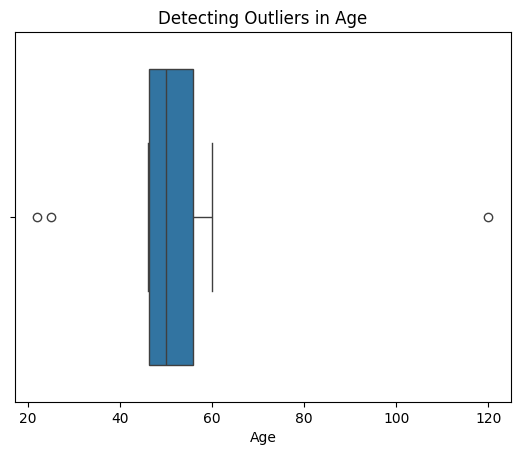

In [18]:
# Detect outliers visually

sns.boxplot (x=df['Age'])
plt.title("Detecting Outliers in Age")
plt.show()

In [19]:
# z-score method to detect outliers

z_scores = stats.zscore(df['Age'])
outliers = df[(abs(z_scores) > 3)]
print("\nOutliers detected based on Z-score:")
print(outliers)


Outliers detected based on Z-score:
Empty DataFrame
Columns: [Age, Salary]
Index: []


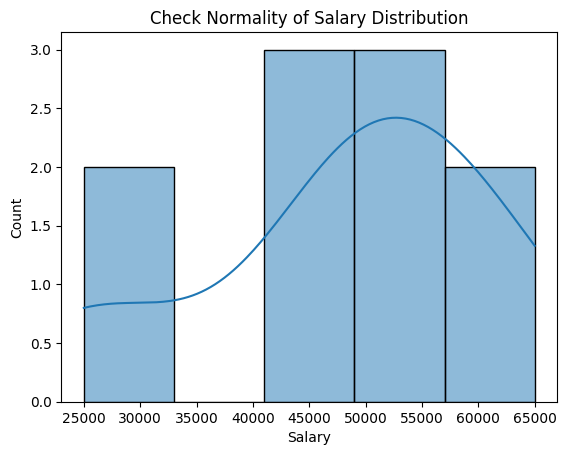

In [20]:
# Validate assumptions (e.g., normality)
sns.histplot (df['Salary'], kde=True)
plt.title("Check Normality of Salary Distribution")
plt.show()

## Data Collection and Import

- Data sources (CSV, Excel, APIs, Database)
- Example :

In [24]:
import pandas as pd
# Load the dataset from a CSV file
df = pd.read_csv("data.csv")

# Displat first 5 rows
print(df.head())

   x   y
0  1   2
1  2   4
2  3   6
3  4   8
4  5  10
